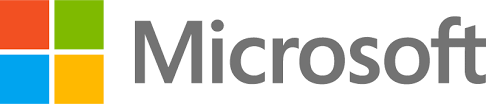

# Introduction

Microsoft Studios has recently ventured into the space of film production, but wants to know what are some key insights and recommendations that can receive to become a profitable film studio. 

Microsoft can increase their profitability if they: A) Release films in during months that have the lowest number of releases, B) Release films primarily on Fridays, in addition to other days that show a high RIO when released on given day, and C) Look into partnering with a highly profitable film studio or invest market research in the studios that have shown the highest domestic gross on films.

# Imports

In [1]:
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt

# First Data Set

From The-Numbers.com that shows the production budgets and gross of a film. Working with this data, I provide an insightful analysis of the Return on Investment(RIO) for further recommendations.  


In [21]:
tf = pd.read_csv('tn.movie_budgets.csv')
tf

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


Cleaning the data set to work with the values.

In [22]:
tf['production_budget'] = tf['production_budget'].str.replace('$', '').str.replace(',', '').astype(int)

In [23]:
tf['worldwide_gross'] = tf['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(int)

Here, I create the Return On Investment (RIO) by dividing the worldwide_gross by the production_budget and rounded the percentage to the nearest decimal place. 

In [24]:
ROI = tf['worldwide_gross']/tf['production_budget']
tf['ROI'] = ROI.round()
tf

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
0,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625",2776345279,7.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1045663875,3.0
2,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350",149762350,0.0
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868",1403013963,4.0
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382",1316721747,4.0
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,$0,0,0.0
5778,79,"Apr 2, 1999",Following,6000,"$48,482",240495,40.0
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,"$1,338",1338,0.0
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,$0,0,0.0


Here I changed created to datetimes, one for the month a movie was release and one for the day of the week a movie was released, and adding a new column representing the day of the week. 

In [25]:
tf['release_Date'] = pd.to_datetime(tf['release_date']).dt.day_name()
tf['release_Date']

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
          ...    
5777       Monday
5778       Friday
5779    Wednesday
5780      Tuesday
5781       Friday
Name: release_Date, Length: 5782, dtype: object

In [26]:
tf['release_date'] = pd.to_datetime(tf['release_date']).dt.month_name()
tf['release_date']

0        December
1             May
2            June
3             May
4        December
          ...    
5777     December
5778        April
5779         July
5780    September
5781       August
Name: release_date, Length: 5782, dtype: object

In [27]:
tf

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,release_Date
0,1,December,Avatar,425000000,"$760,507,625",2776345279,7.0,Friday
1,2,May,Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1045663875,3.0,Friday
2,3,June,Dark Phoenix,350000000,"$42,762,350",149762350,0.0,Friday
3,4,May,Avengers: Age of Ultron,330600000,"$459,005,868",1403013963,4.0,Friday
4,5,December,Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382",1316721747,4.0,Friday
...,...,...,...,...,...,...,...,...
5777,78,December,Red 11,7000,$0,0,0.0,Monday
5778,79,April,Following,6000,"$48,482",240495,40.0,Friday
5779,80,July,Return to the Land of Wonders,5000,"$1,338",1338,0.0,Wednesday
5780,81,September,A Plague So Pleasant,1400,$0,0,0.0,Tuesday


Then, I used a groupby to look at release date by month and day of the week in relation to the highest ROI. I grouped each of them in to different lists to later visualize. 

In [28]:
list(tf.groupby(['release_date', 'ROI']).size().index)

[('April', 0.0),
 ('April', 1.0),
 ('April', 2.0),
 ('April', 3.0),
 ('April', 4.0),
 ('April', 5.0),
 ('April', 6.0),
 ('April', 7.0),
 ('April', 8.0),
 ('April', 9.0),
 ('April', 10.0),
 ('April', 11.0),
 ('April', 12.0),
 ('April', 13.0),
 ('April', 14.0),
 ('April', 15.0),
 ('April', 16.0),
 ('April', 17.0),
 ('April', 18.0),
 ('April', 20.0),
 ('April', 23.0),
 ('April', 27.0),
 ('April', 29.0),
 ('April', 34.0),
 ('April', 36.0),
 ('April', 37.0),
 ('April', 39.0),
 ('April', 40.0),
 ('April', 61.0),
 ('April', 64.0),
 ('April', 67.0),
 ('April', 75.0),
 ('April', 78.0),
 ('April', 90.0),
 ('August', 0.0),
 ('August', 1.0),
 ('August', 2.0),
 ('August', 3.0),
 ('August', 4.0),
 ('August', 5.0),
 ('August', 6.0),
 ('August', 7.0),
 ('August', 8.0),
 ('August', 9.0),
 ('August', 10.0),
 ('August', 11.0),
 ('August', 12.0),
 ('August', 13.0),
 ('August', 16.0),
 ('August', 17.0),
 ('August', 18.0),
 ('August', 20.0),
 ('August', 25.0),
 ('August', 27.0),
 ('August', 31.0),
 ('August

In [29]:
month_release_dates = ['April', 'August', 'December', 'February', 'January', 'July', 'June', 'March', 'May', 'November', 'October', 'September']
month_release_date_highest_ROI = [90, 312, 124, 292, 122, 417, 115, 499, 342, 225, 264, 432]

In [30]:
list(tf.groupby(['release_Date', 'ROI']).size().index)

[('Friday', 0.0),
 ('Friday', 1.0),
 ('Friday', 2.0),
 ('Friday', 3.0),
 ('Friday', 4.0),
 ('Friday', 5.0),
 ('Friday', 6.0),
 ('Friday', 7.0),
 ('Friday', 8.0),
 ('Friday', 9.0),
 ('Friday', 10.0),
 ('Friday', 11.0),
 ('Friday', 12.0),
 ('Friday', 13.0),
 ('Friday', 14.0),
 ('Friday', 15.0),
 ('Friday', 16.0),
 ('Friday', 17.0),
 ('Friday', 18.0),
 ('Friday', 19.0),
 ('Friday', 20.0),
 ('Friday', 21.0),
 ('Friday', 22.0),
 ('Friday', 23.0),
 ('Friday', 24.0),
 ('Friday', 25.0),
 ('Friday', 26.0),
 ('Friday', 27.0),
 ('Friday', 28.0),
 ('Friday', 29.0),
 ('Friday', 30.0),
 ('Friday', 31.0),
 ('Friday', 32.0),
 ('Friday', 33.0),
 ('Friday', 34.0),
 ('Friday', 36.0),
 ('Friday', 37.0),
 ('Friday', 39.0),
 ('Friday', 40.0),
 ('Friday', 41.0),
 ('Friday', 42.0),
 ('Friday', 43.0),
 ('Friday', 45.0),
 ('Friday', 47.0),
 ('Friday', 51.0),
 ('Friday', 55.0),
 ('Friday', 56.0),
 ('Friday', 61.0),
 ('Friday', 63.0),
 ('Friday', 64.0),
 ('Friday', 65.0),
 ('Friday', 67.0),
 ('Friday', 69.0),
 ('

In [31]:
roi_day = ['Friday','Monday','Saturday','Sunday','Thursday', 'Tuesday','Wednesday']
roi_release_date_highest_ROI = [499.0,100.0,180.0,225.0,312.0,264.0,414.0]

Here, I show the value_counts of the ROI to see what is the most common ROI on a film to provide an insight to the most common ROI that Microsoft could receive on a film. 

In [32]:
tf['ROI'].value_counts()

0.0      1458
1.0      1224
2.0       904
3.0       625
4.0       409
         ... 
432.0       1
55.0        1
64.0        1
124.0       1
215.0       1
Name: ROI, Length: 99, dtype: int64

In [33]:
roi_percentage = list(tf['ROI'].value_counts(ascending=False).index)

In [34]:
roi_number = list(tf['ROI'].value_counts())

In [35]:
ROI.describe()

count    5782.000000
mean        4.800161
std        29.530282
min         0.000000
25%         0.492296
50%         1.708310
75%         3.758346
max      1800.000000
dtype: float64

In [36]:
ROI.median()

1.7083098257683216

# Second Data Set
Here, I explore a data set from The Movie Database that offers a host of release dates that I would use to have a greater insight into how many movies are released in a month or in a day. 

In [37]:
movie_dates = pd.read_csv('tmdb.movies.csv')
movie_dates

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


Here, I work with this data set to see how many releases occur by a given day and month and see what months have the highest and lowest release dates. 

In [38]:
movie_dates['release_date'] = pd.to_datetime(movie_dates['release_date'])
movie_dates['release_date'] 

0       2010-11-19
1       2010-03-26
2       2010-05-07
3       1995-11-22
4       2010-07-16
           ...    
26512   2018-10-13
26513   2018-05-01
26514   2018-10-01
26515   2018-06-22
26516   2018-10-05
Name: release_date, Length: 26517, dtype: datetime64[ns]

In [39]:
movie_dates['release_date'].dt.day_name().value_counts()

Friday       9171
Tuesday      4380
Saturday     3568
Thursday     2651
Sunday       2544
Wednesday    2238
Monday       1965
Name: release_date, dtype: int64

In [40]:
days = list(movie_dates['release_date'].dt.day_name().value_counts().index)

In [41]:
days_ranked = list(movie_dates['release_date'].dt.day_name().value_counts())

In [42]:
movie_dates['release_date'].dt.month_name().value_counts()

January      3132
October      3035
April        2566
March        2406
November     2338
September    2264
June         2166
December     1929
May          1865
August       1698
February     1614
July         1504
Name: release_date, dtype: int64

In [43]:
movie_months= list(movie_dates['release_date'].dt.month_name().value_counts().index)
movie_months

['January',
 'October',
 'April',
 'March',
 'November',
 'September',
 'June',
 'December',
 'May',
 'August',
 'February',
 'July']

In [44]:
movie_month_values = list(movie_dates['release_date'].dt.month_name().value_counts())
movie_month_values

[3132, 3035, 2566, 2406, 2338, 2264, 2166, 1929, 1865, 1698, 1614, 1504]

# Third Data Set
This data set is from Box Office Mojo where I explore the data to see what film studios have the highest domestic growth that Microsoft could potentially emulate or partner with in the future.  

In [45]:
sf= pd.read_csv('bom.movie_gross.csv', index_col=False)
sf

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


Cleaning the Dataset to work with the values

In [46]:
sf['foreign_gross'] = sf['foreign_gross'].fillna(0)
sf

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0,2018
3383,Edward II (2018 re-release),FM,4800.0,0,2018
3384,El Pacto,Sony,2500.0,0,2018
3385,The Swan,Synergetic,2400.0,0,2018


Here, I look at the studios with the highest domestic gross instead of foreign gross because many films are missing foreign gross. Also, instead of RIO I am looking at domestic gross becasue this particular data set didn't have a production budget section. 

In [47]:
sf_rank = sf.nlargest(100, ['domestic_gross'])
sf_rank

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
...,...,...,...,...,...
1484,Dawn of the Planet of the Apes,Fox,208500000.0,502100000,2014
1136,Thor: The Dark World,BV,206400000.0,438200000,2013
1485,The Amazing Spider-Man 2,Sony,202900000.0,506100000,2014
1138,World War Z,Par.,202400000.0,337600000,2013


# Fourth Data Set 
Extra Data Set I received from an outside source from The Numbers that Microsoft could consider as an important insight of what movie genres have been profitable since 1995. 

In [48]:
df = pd.read_csv('genre.csv')
df

,Rank,Genre,Movies,Total Box Office,Tickets,Share
0,1,Adventure,"1,094","$64,269,080,940.00","9,187,123,822",27.20%
1,2,Action,"1,081","$48,356,755,326.00","6,809,203,429",20.47%
2,3,Drama,"5,445","$35,673,945,653.00","5,462,302,430",15.10%
3,4,Comedy,"2,406","$33,763,810,996.00","5,175,386,897",14.29%
4,5,Thriller/Suspense,"1,179","$19,805,876,383.00","2,878,916,071",8.38%
5,6,Horror,701,"$13,119,960,491.00","1,882,373,457",5.55%
6,7,Romantic Comedy,623,"$10,419,075,288.00","1,683,618,047",4.41%
7,8,Musical,200,"$4,278,581,571.00","566,871,859",1.81%
8,9,Documentary,"2,396","$2,505,117,990.00","374,525,816",1.06%
9,10,Black Comedy,213,"$2,185,433,323.00","319,798,810",0.92%


The reason an error appears here is because .str is used to change a string and (float). Thus, running this after the first initial time wouldn't work because the .str works for strings and this was changed from a string to float. 

In [49]:
df['Total Box Office'] = df['Total Box Office'].str.replace('$', '').str.replace(',', '').astype(float)

In [50]:
df['Total Box Office']

0     6.426908e+10
1     4.835676e+10
2     3.567395e+10
3     3.376381e+10
4     1.980588e+10
5     1.311996e+10
6     1.041908e+10
7     4.278582e+09
8     2.505118e+09
9     2.185433e+09
10    1.292562e+09
11    3.970821e+08
12    6.259469e+07
13    6.216960e+05
14    2.600000e+02
Name: Total Box Office, dtype: float64

# Visualizations

Most months that show a high number of releases also show a lower RIO compared to months that have a low number of releases have a higher RIO.

[Text(0.5, 1.0, 'Months Releases and Highest ROI'),
 Text(0.5, 0, 'Count'),
 Text(0, 0.5, 'Months')]

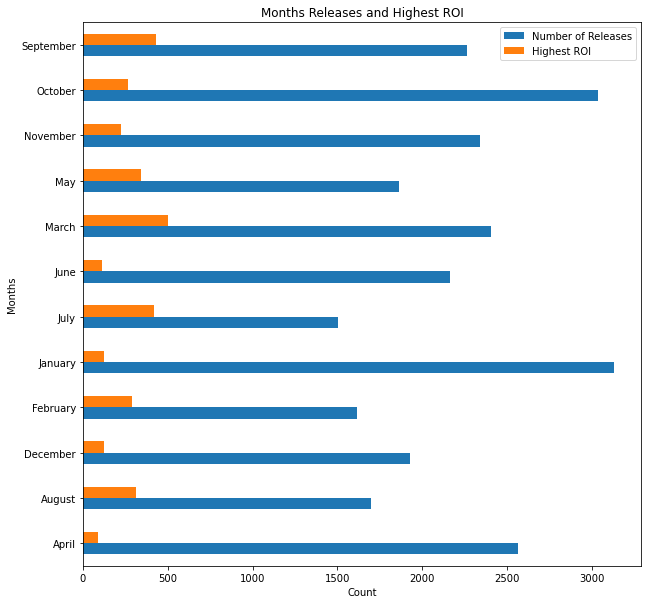

In [51]:
index= ['April', 'August', 'December', 'February', 'January', 'July', 'June', 'March', 'May', 'November', 'October', 'September']
n_of_releases = [2566, 1698, 1929, 1614, 3132, 1504, 2166, 2406, 1865, 2338, 3035, 2264]
highest_ROI =  [90, 312, 124, 292, 122, 417, 115, 499, 342, 225, 264, 432]
mf = pd.DataFrame({'Number of Releases': n_of_releases, 'Highest ROI': highest_ROI}, index=index)
ax = mf.plot.barh(figsize=(10,10))
ax.set(title = 'Months Releases and Highest ROI',
       xlabel = 'Count',
       ylabel = 'Months')

Friday has the highest number of film releases, and the highest RIO, but all days that follow have a correlation of high number of releases and low RIO and a low number of releases with a high RIO.



[Text(0.5, 1.0, 'Days Releases and Highest ROI'),
 Text(0.5, 0, ''),
 Text(0, 0.5, 'Days')]

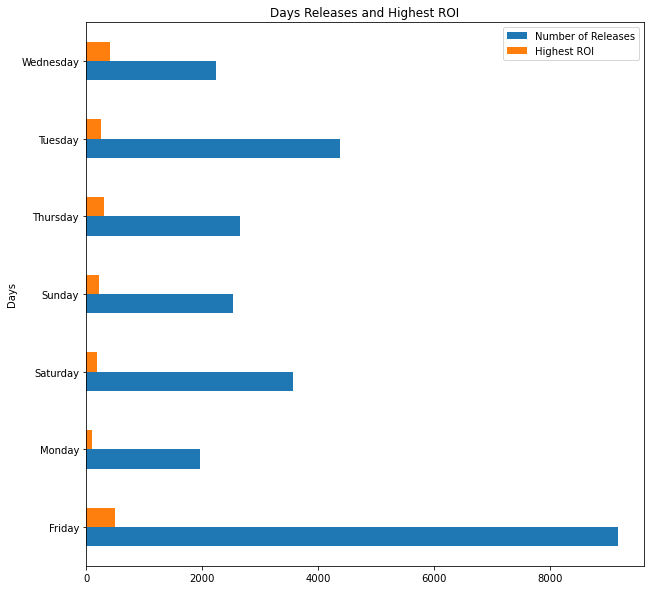

In [52]:
day = ['Friday','Monday','Saturday','Sunday','Thursday', 'Tuesday','Wednesday']
day_highest_ROI = [499.0,100.0,180.0,225.0,312.0,264.0,414.0]
day_n_release= [9171.0, 1965.0, 3568.0, 2544.0, 2651.0, 4380, 2238]
ddf = pd.DataFrame({'Number of Releases': day_n_release, 'Highest ROI': day_highest_ROI}, index=day)
ax = ddf.plot.barh(figsize=(10,10))
ax.set(title = 'Days Releases and Highest ROI',
       xlabel = '',
       ylabel = 'Days')

Film Studios that have made the highest domestic gross between the years of 2010-2018.



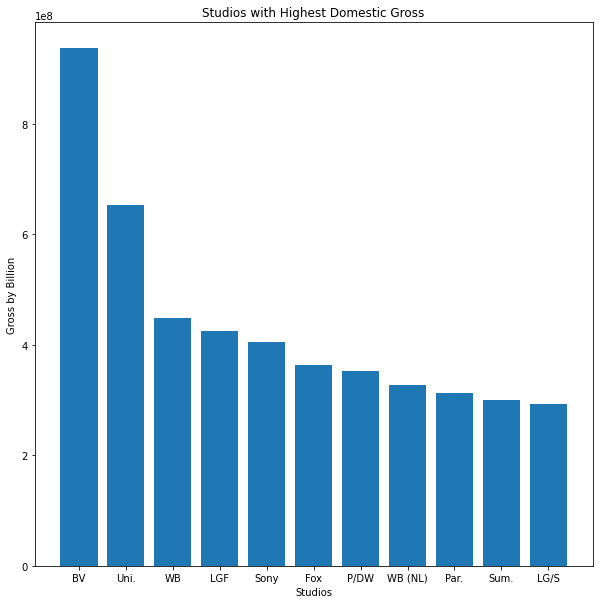

In [53]:
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(x = sf_rank['studio'], height = sf_rank['domestic_gross'])
ax.set(title = 'Studios with Highest Domestic Gross',
       xlabel = 'Studios',
       ylabel = 'Gross by Billion')
plt.savefig('Studios with Highest Domestic Gross')

# Extra Visualizations 

This is a general spread of RIOS and what is the most common RIO received on a film.


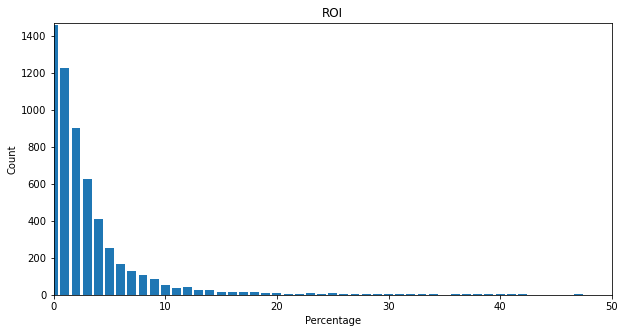

In [54]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x = roi_percentage, height = roi_number)
ax.set(title = 'ROI',
       xlabel = 'Percentage',
       ylabel = 'Count')
ax.set_xlim(0, 50)
ax.set_ylim(0, 1470)
plt.savefig('ROI')

This is an extra data set I receieved from The-Numbers that shows what movies have made the most revenue from 1995-2021

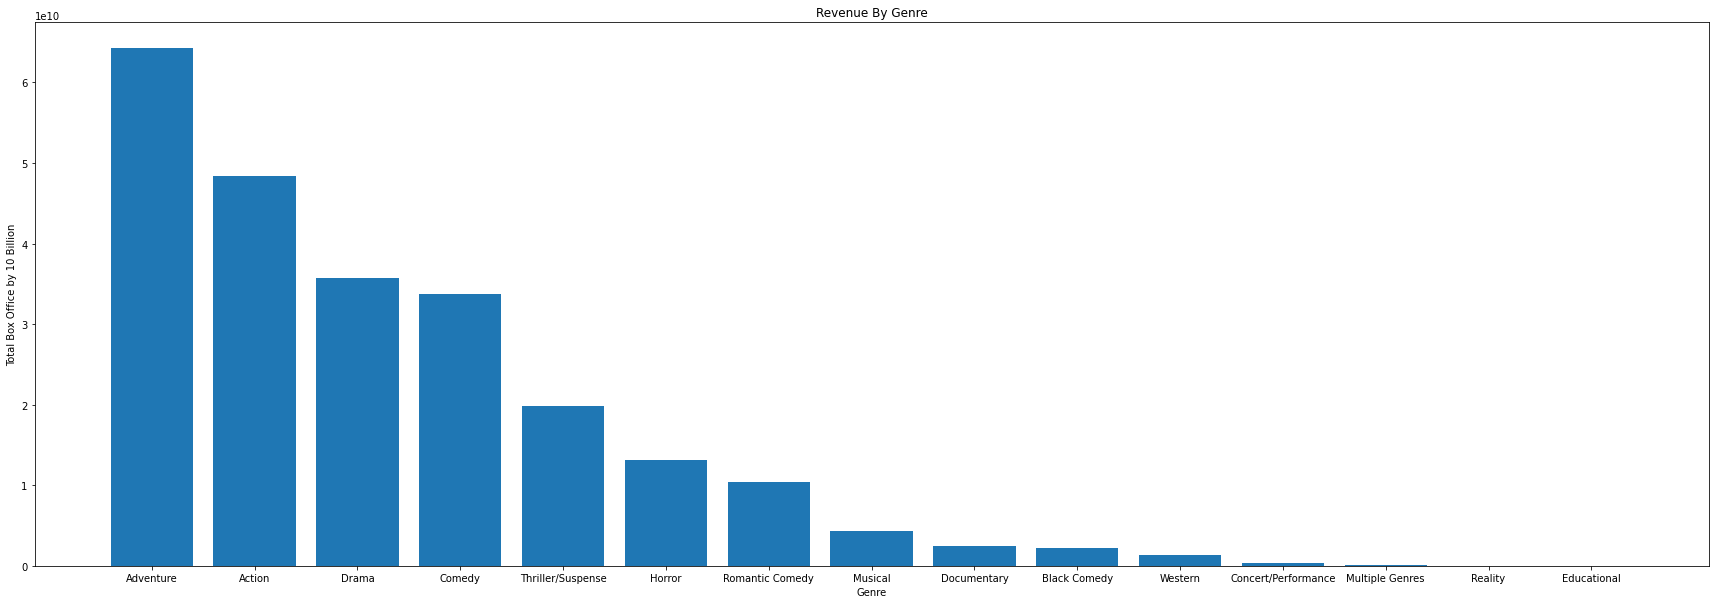

In [55]:
fig, ax = plt.subplots(figsize=(30,10))
ax.bar(x = df['Genre'], height = df['Total Box Office'])
ax.set(title = 'Revenue By Genre',
       xlabel = 'Genre',
       ylabel = 'Total Box Office by 10 Billion')
plt.savefig('Revenue By Genre')

# Conclusion 

Conclusion & Future Steps

The mains months that Microsoft Studios should release their films based on ROI follow in this respective order: March, September, July, May, August, February, October, November, December, January, June, and April

The mains months that Microsoft Studios should release their films based on ROI follow in this respective order: Friday, Wednesday, Thursday, Tuesday, Sunday, Saturday, and Monday

Microsoft Studios should partner with a studio that has shown high level of profitability. If they don’t partner with any studio, they should at least put focus their main market research on the studios with the highest RIOs to have greater profitability in the future.